In [92]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import odeint
from scipy.integrate import ode
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
%matplotlib inline

In [93]:
c = constants.speed_of_light
m_e = constants.electron_mass
m_n = constants.m_n
pi = constants.pi
h_bar = constants.hbar
A_by_Z = 1

epsilon_0 = (m_e**4)*(c**5)/((pi**2)*(h_bar**3))

In [141]:
def epsilon_elec(x):
    return (1/8)*epsilon_0*((2*(x**3) + x)*((1+(x**2))**0.5) - np.arcsinh(x))
def n(ferm_en):
    return ferm_en**3/(3*(pi**2)*(h_bar**3))
def epsilon(x,k_f):
    return n(k_f)*m_n*A_by_Z + epsilon_elec(x)
def pressure(x): 
    return (1/24)*epsilon_0*((2*(x**3) -3*x)*(1+(x**2))**0.5 + 3*np.arcsinh(x))

def epsilon_fit(p, a_nr, a_r):
    return epsilon_0*(a_nr*((p/epsilon_0)**(3/5)) + a_r*((p/epsilon_0)**(3/4)))

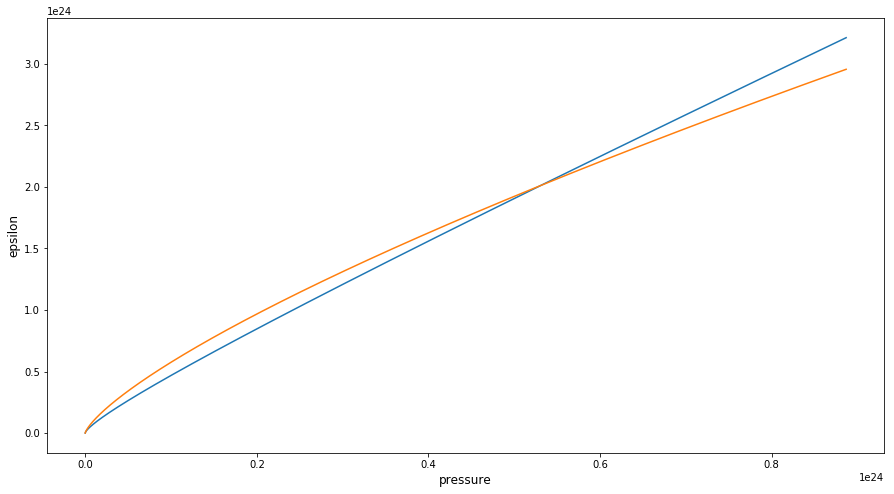

(array([4.65573099e-17, 5.25041722e+00]), array([[ 0.00779633, -0.00649035],
       [-0.00649035,  0.00545089]]))


In [190]:
k_fs = np.arange(0,(3.0001*m_e*c),(0.001*m_e*c))
xs = k_fs/(m_e*c)
epsilons = np.array(epsilon(xs,k_fs))
pressures = np.array(pressure(xs))

pnr0,pr0 = curve_fit(epsilon_fit, pressures, epsilons, bounds=(0, 999999))[0]

sketch = plt.figure(figsize = (15,8))
ax1 = sketch.add_subplot(111)
ax1.plot(pressures, epsilons)
ax1.plot(pressures, epsilon_fit(pressures, pnr0,pr0))
ax1.set_xlabel("pressure",fontsize='large')
ax1.set_ylabel("epsilon",fontsize='large')
plt.show()

print(curve_fit(epsilon_fit, pressures, epsilons, bounds=(0, 999999)))